# group assignment

In this assignment, you will apply your advanced programming and data analysis skills to solve a real-world problem.
In practice, you will have to identify relevant patterns in very complex chemoinformatics data and apply them to a new set of molecules you don’t know the ALDH1 inhibition of. 


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors

from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import PandasTools

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA

...

**import data:**

In [2]:
df_data = pd.read_csv('tested_molecules-1.csv')
df_inh = df_data[df_data['ALDH1_inhibition'] == 1]
df_data

,SMILES,ALDH1_inhibition
0,COc1ccccc1CC(NC(C)=O)C(=O)NC1CCN(c2nnnn2-c2ccc...,1
1,O=C(CSc1nc2cccnc2n1Cc1ccccc1)NCc1ccco1,1
2,Cc1cccc2cc(C[NH+](CC3CCCO3)C(c3nnnn3Cc3ccco3)C...,1
3,CCN(CC)c1ccc2c(Cl)c(Br)c(=O)oc2c1,1
4,CS(=O)(=O)N1CCc2cc(-c3csc(NC(=O)Cc4cccs4)n3)ccc21,1
...,...,...
995,COc1ccc(N2C(=O)CC([NH2+]C3CC3)C2=O)cc1,0
996,CCNc1oc(COc2cccc(C)c2)nc1C#N,0
997,NC(=O)Cn1cnc(-c2ccccc2)c1,0
998,Cc1cc(NC(=O)CSc2nc3c(c(=O)n(C)c(=O)n3C)n2C(C)C...,0


In [3]:
descriptions_list = [n[0] for n in Descriptors._descList]
physical_descriptions = [i for i in descriptions_list if not i.startswith('fr_')]
group_descriptions = [i for i in descriptions_list if i.startswith('fr_')]

pysc_calc = MoleculeDescriptors.MolecularDescriptorCalculator(physical_descriptions)
group_calc = MoleculeDescriptors.MolecularDescriptorCalculator(group_descriptions)

mols = [Chem.MolFromSmiles(smi) for smi in df_data['SMILES']]

In [4]:
pysc_descr = [pysc_calc.CalcDescriptors(m)  for m in mols]
group_descr = [group_calc.CalcDescriptors(m)  for m in mols]

df_physical = pd.DataFrame(data = pysc_descr.copy(),columns=physical_descriptions)
df_physical

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumSaturatedCarbocycles,NumSaturatedHeterocycles,NumSaturatedRings,RingCount,MolLogP,MolMR
0,13.083531,13.083531,0.001173,-0.683140,0.520365,463.542,434.310,463.233188,178,0,...,8,2,10,8,0,1,1,4,1.50330,126.8344
1,12.170097,12.170097,0.066966,-0.066966,0.498564,378.457,360.313,378.115047,136,0,...,6,1,7,7,0,0,0,4,3.48110,104.3507
2,10.905837,10.905837,0.016881,-0.016881,0.382043,477.589,444.325,477.260865,184,0,...,8,2,9,9,0,1,1,5,2.83782,129.8585
3,11.562446,11.562446,0.270607,-0.454447,0.795948,330.609,317.505,328.981818,96,0,...,3,0,5,3,0,0,0,2,4.05510,78.7550
4,12.108866,12.108866,0.086947,-3.251317,0.687618,419.553,402.417,419.043204,140,0,...,6,1,9,5,0,0,0,4,3.37490,110.0965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12.276695,12.276695,0.095308,-0.234165,0.779148,261.301,244.165,261.123369,100,0,...,3,1,5,4,1,1,2,3,0.05290,68.8394
996,8.926724,8.926724,0.197944,0.197944,0.891297,257.293,242.173,257.116427,98,0,...,5,1,5,5,0,0,0,2,2.86550,70.8927
997,10.688087,10.688087,0.166502,-0.368508,0.805927,201.229,190.141,201.090212,76,0,...,3,1,4,3,0,0,0,2,1.03540,56.8574
998,12.603109,12.603109,0.065686,-0.447592,0.644831,392.441,372.281,392.126674,144,0,...,10,1,11,5,0,0,0,3,1.04182,101.1937


In [5]:
print('amount of different unique values:', len(np.unique(df_physical.values)), "; unique values:", np.unique(df_physical.values))
print()

amount of different unique values: 56323 ; unique values: [-1.45275745e+01 -1.14461026e+01 -9.31103340e+00 ...  1.27628627e+09
  1.56795307e+09  1.62795459e+09]



In [6]:
df_physical[pd.isna(df_physical).any(axis=1)]

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumSaturatedCarbocycles,NumSaturatedHeterocycles,NumSaturatedRings,RingCount,MolLogP,MolMR


In [7]:
df_group = pd.DataFrame(data=group_descr.copy(),columns=group_descriptions)
df_group

,fr_Al_COO,fr_Al_OH,fr_Al_OH_noTert,fr_ArN,fr_Ar_COO,fr_Ar_N,fr_Ar_NH,fr_Ar_OH,fr_COO,fr_COO2,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0,0,0,0,0,4,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,3,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,5,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,5,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [8]:
print('amount of different unique values:', len(np.unique(df_group.values)), "; unique values:", np.unique(df_group.values))

amount of different unique values: 9 ; unique values: [0 1 2 3 4 5 6 7 8]


In [9]:
df_group[pd.isna(df_group).any(axis=1)]

,fr_Al_COO,fr_Al_OH,fr_Al_OH_noTert,fr_ArN,fr_Ar_COO,fr_Ar_N,fr_Ar_NH,fr_Ar_OH,fr_COO,fr_COO2,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6743: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6744: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


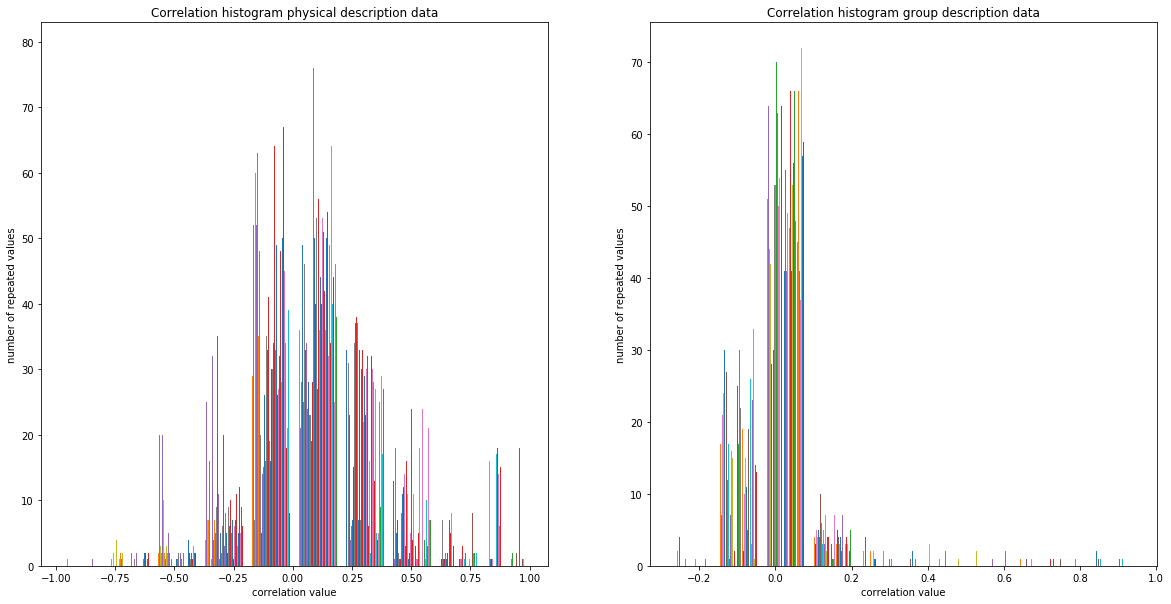

In [10]:
df_phys_corr = df_physical.corr()
df_group_corr = df_group.corr()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

ax[0].hist(df_phys_corr[df_phys_corr != 1]);
ax[0].set_title('Correlation histogram physical description data');
ax[0].set_ylabel('number of repeated values');
ax[0].set_xlabel('correlation value');
ax[1].hist(df_group_corr[df_group_corr != 1]);
ax[1].set_title('Correlation histogram group description data');
ax[1].set_ylabel('number of repeated values');
ax[1].set_xlabel('correlation value');

In [11]:
df_corr_90 = df_phys_corr[(df_phys_corr.corr()>=0.9)&(df_phys_corr.corr()!=1)].dropna(how='all')
df_corr_90

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumSaturatedCarbocycles,NumSaturatedHeterocycles,NumSaturatedRings,RingCount,MolLogP,MolMR
MolWt,NaN,NaN,NaN,NaN,NaN,NaN,0.997734,0.999992,0.964362,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.945589
HeavyAtomMolWt,NaN,NaN,NaN,NaN,NaN,0.997734,NaN,0.997625,0.949831,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.931275
ExactMolWt,NaN,NaN,NaN,NaN,NaN,0.999992,0.997625,NaN,0.965189,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.946111
NumValenceElectrons,NaN,NaN,NaN,NaN,NaN,0.964362,0.949831,0.965189,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.958184
MaxPartialCharge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NumSaturatedCarbocycles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumSaturatedHeterocycles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumSaturatedRings,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RingCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
cols = [(i) for i in df_corr_90.columns if i in df_corr_90.index]
        
df_physical_new = df_physical.drop(columns=cols)
df_physical_new

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,NumRadicalElectrons,MinPartialCharge,MaxAbsPartialCharge,BCUT2D_MWHI,BCUT2D_MWLOW,...,VSA_EState3,VSA_EState4,VSA_EState5,VSA_EState7,VSA_EState8,VSA_EState9,FractionCSP3,NumAromaticHeterocycles,NumAromaticRings,MolLogP
0,13.083531,13.083531,0.001173,-0.683140,0.520365,0,-0.496477,0.496477,16.465857,10.012387,...,18.075462,1.758225,0.920982,1.837103,2.822263,1.591488,0.375000,1,3,1.50330
1,12.170097,12.170097,0.066966,-0.066966,0.498564,0,-0.467476,0.467476,32.166556,10.202245,...,3.630481,2.804024,0.940073,3.352383,1.040755,0.000000,0.150000,3,4,3.48110
2,10.905837,10.905837,0.016881,-0.016881,0.382043,0,-0.492903,0.492903,16.492058,9.989823,...,24.674971,2.688982,1.918367,3.929994,9.023954,0.000000,0.461538,3,4,2.83782
3,11.562446,11.562446,0.270607,-0.454447,0.795948,0,-0.421732,0.421732,79.918731,10.173315,...,1.130921,1.079478,0.000000,0.000000,5.962156,0.000000,0.307692,1,2,4.05510
4,12.108866,12.108866,0.086947,-3.251317,0.687618,0,-0.301646,0.301646,32.233291,10.071048,...,7.239143,3.417866,-0.086947,2.249137,0.470945,-3.251317,0.222222,2,3,3.37490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12.276695,12.276695,0.095308,-0.234165,0.779148,0,-0.496766,0.496766,16.465312,10.223467,...,2.045394,0.627312,0.502844,2.613467,0.000000,1.585114,0.428571,0,1,0.05290
996,8.926724,8.926724,0.197944,0.197944,0.891297,0,-0.483868,0.483868,16.491677,10.220307,...,11.874243,1.375601,1.531071,0.000000,4.784953,0.000000,0.285714,1,2,2.86550
997,10.688087,10.688087,0.166502,-0.368508,0.805927,0,-0.368122,0.368122,16.147009,10.162385,...,0.000000,6.957623,-0.368508,3.409907,0.166502,0.000000,0.090909,1,2,1.03540
998,12.603109,12.603109,0.065686,-0.447592,0.644831,0,-0.359541,0.359541,32.166556,10.351430,...,6.838974,-0.225238,0.718925,0.000000,5.550718,2.997788,0.437500,3,3,1.04182


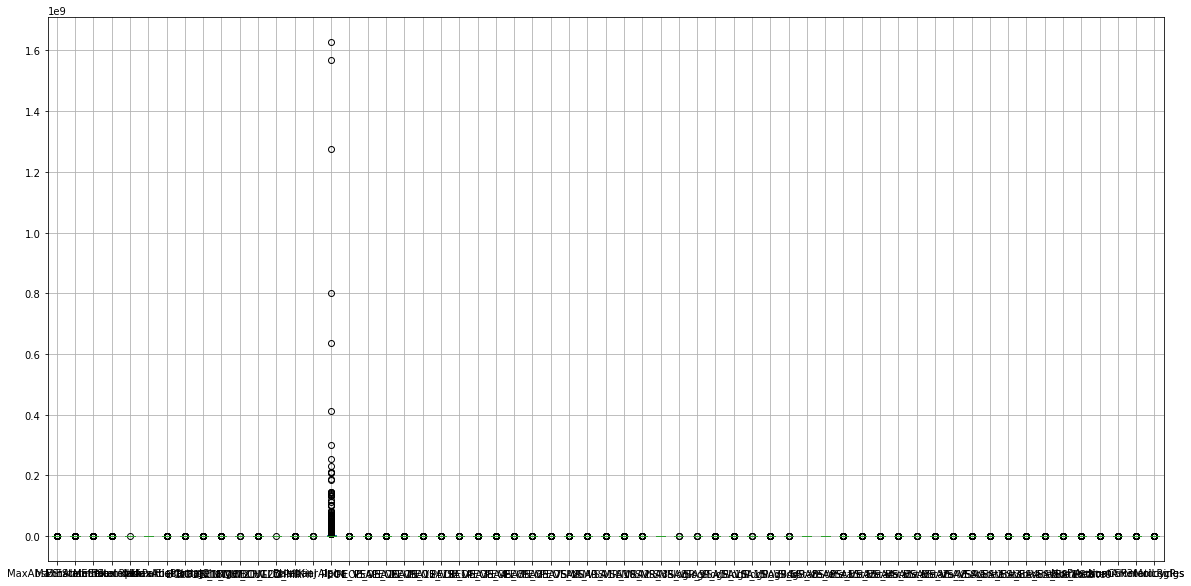

In [13]:
fig, ax = plt.subplots(figsize=(20,10));
df_physical_new.boxplot();

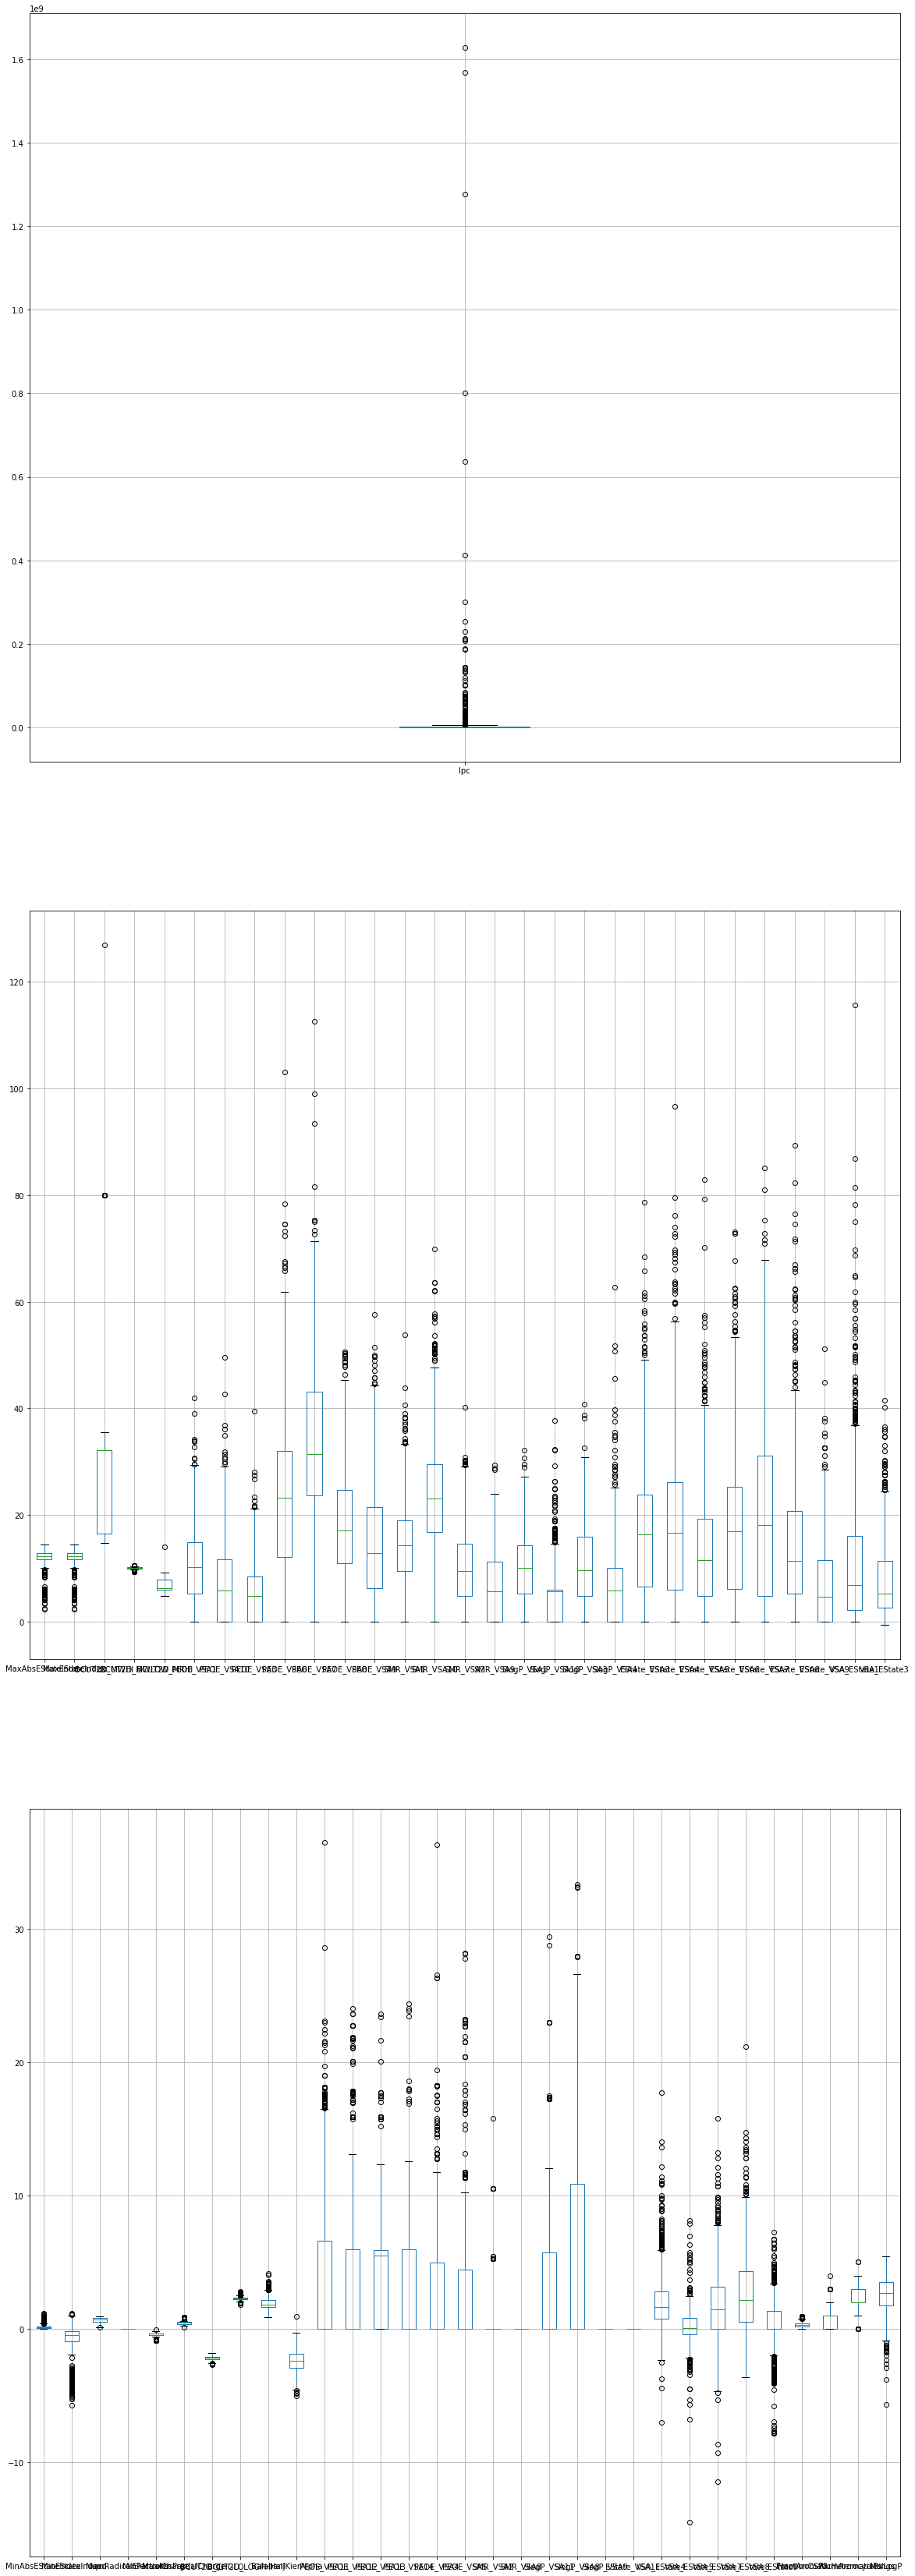

In [14]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(20,60))

df_physical_new.loc[:,df_physical_new.mean(axis=0) >= 50].boxplot(ax=ax[0]);
df_physical_new.loc[:,(df_physical_new.mean(axis=0) < 50) & (df_physical_new.mean(axis=0) >= 5)].boxplot(ax=ax[1]);
df_physical_new.loc[:,df_physical_new.mean(axis=0) < 5].boxplot(ax=ax[2]);

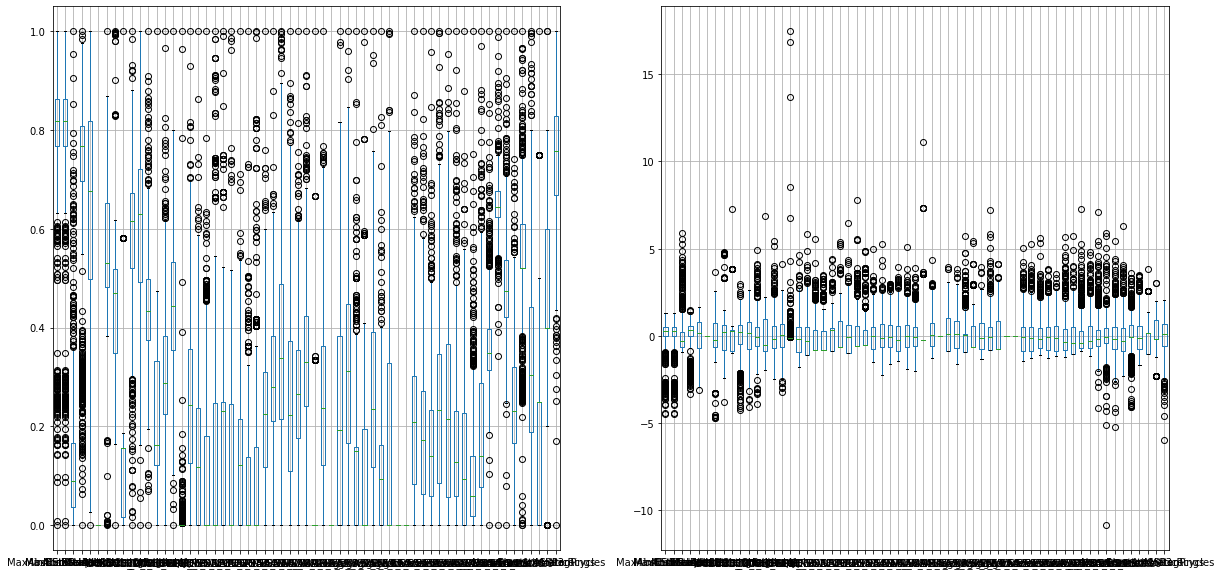

In [15]:
scaler_mm = MinMaxScaler()
df_phys_scaled_mm = pd.DataFrame(scaler_mm.fit_transform(df_physical_new), columns = list(df_physical_new.columns))

scaler_std = StandardScaler()
df_phys_scaled_std = pd.DataFrame(scaler_std.fit_transform(df_physical_new), columns = list(df_physical_new.columns))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
df_phys_scaled_mm.boxplot(ax=ax[0]);
df_phys_scaled_std.boxplot(ax=ax[1]);

In [16]:
def pca_fitting(df_scaled):
    pca = PCA()
    X_pca = pca.fit_transform(df_scaled)

    n_components = len(pca.explained_variance_ratio_)
    explained_variance = pca.explained_variance_ratio_
    cum_explained_variance = np.cumsum(explained_variance)
    idx = np.arange(n_components)+1
    df_explained_variance = pd.DataFrame([explained_variance, cum_explained_variance], 
                                         index=['explained variance', 'cumulative'], 
                                         columns=idx).T
    return [idx,df_explained_variance]

idx_mm,df_mm_explained_variance = pca_fitting(df_phys_scaled_mm)
idx_std,df_std_explained_variance = pca_fitting(df_phys_scaled_std)

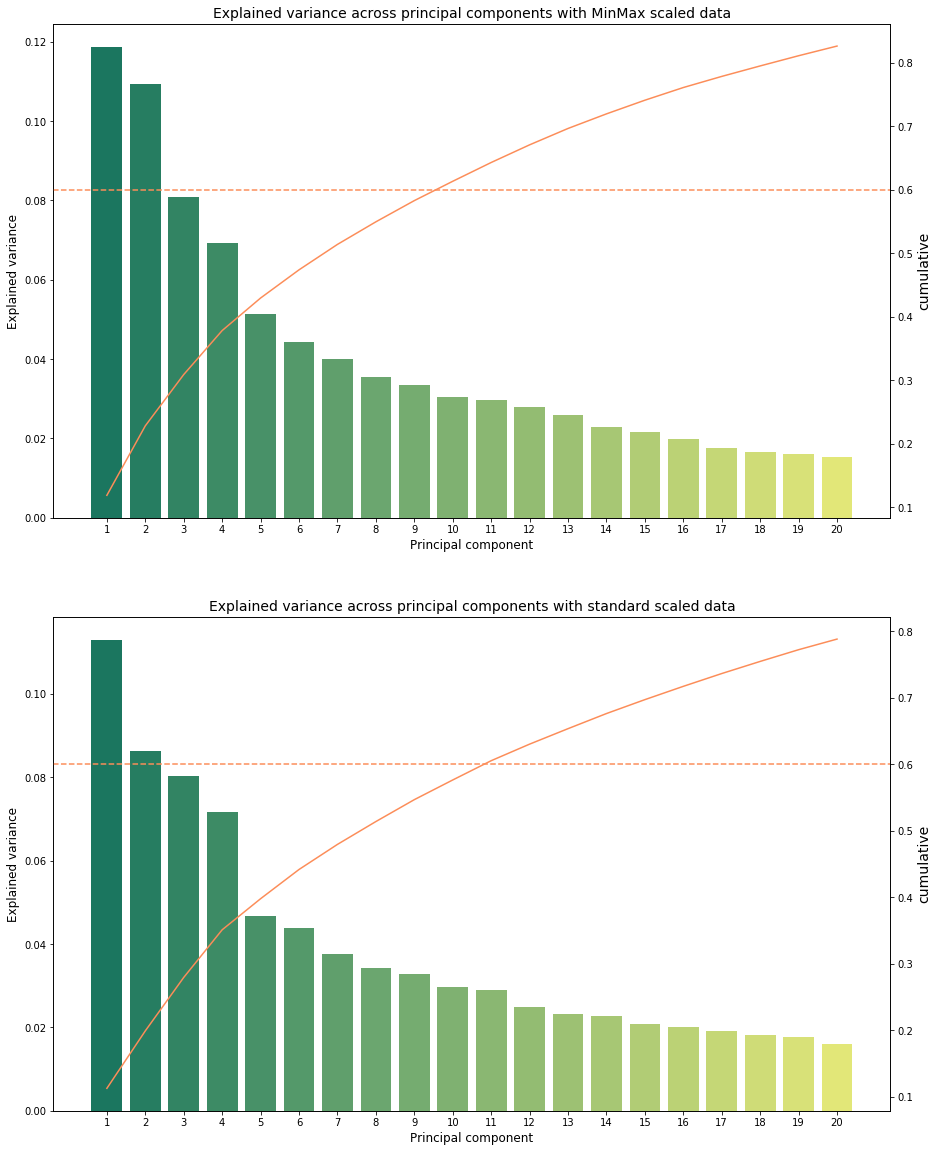

In [17]:
nr_comp = 20
confidance_level = 0.6

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15,20));

ax1 = sns.barplot(x=idx_mm[:nr_comp], y='explained variance', data=df_mm_explained_variance.loc[:nr_comp,:], palette='summer', ax=ax[0]);
ax1 = ax1.twinx();

ax[0].set_title('Explained variance across principal components with MinMax scaled data', fontsize=14);
ax[0].set_xlabel('Principal component', fontsize=12);
ax[0].set_ylabel('Explained variance', fontsize=12);
ax1.grid(False);
ax1.set_ylabel('Cumulative', fontsize=14);
ax1 = sns.lineplot(x=idx_mm[:nr_comp]-1, y='cumulative', data=df_mm_explained_variance.loc[:nr_comp,:], color='#fc8d59');
ax1.axhline(confidance_level, ls='--', color='#fc8d59');

ax2 = sns.barplot(x=idx_std[:nr_comp], y='explained variance', data=df_std_explained_variance.loc[:nr_comp,:], palette='summer', ax=ax[1]);
ax2 = ax2.twinx();

ax[1].set_title('Explained variance across principal components with standard scaled data', fontsize=14);
ax[1].set_xlabel('Principal component', fontsize=12);
ax[1].set_ylabel('Explained variance', fontsize=12);
ax2.grid(False);
ax2.set_ylabel('Cumulative', fontsize=14);
ax2 = sns.lineplot(x=idx_std[:nr_comp]-1, y='cumulative', data=df_std_explained_variance.loc[:nr_comp,:], color='#fc8d59');
ax2.axhline(confidance_level, ls='--', color='#fc8d59');

In [18]:
mm_pc_max = df_mm_explained_variance[df_mm_explained_variance['cumulative'] >= confidance_level].index[0]
std_pc_max = df_std_explained_variance[df_std_explained_variance['cumulative'] >= confidance_level].index[0]
print('To get to the confidance level of {}%, we need {} components with the MinMax scaled data; we need {} components with the Standard scaled data.'.format(confidance_level*100,mm_pc_max,std_pc_max))

To get to the confidance level of 60.0%, we need 10 components with the MinMax scaled data; we need 11 components with the Standard scaled data.


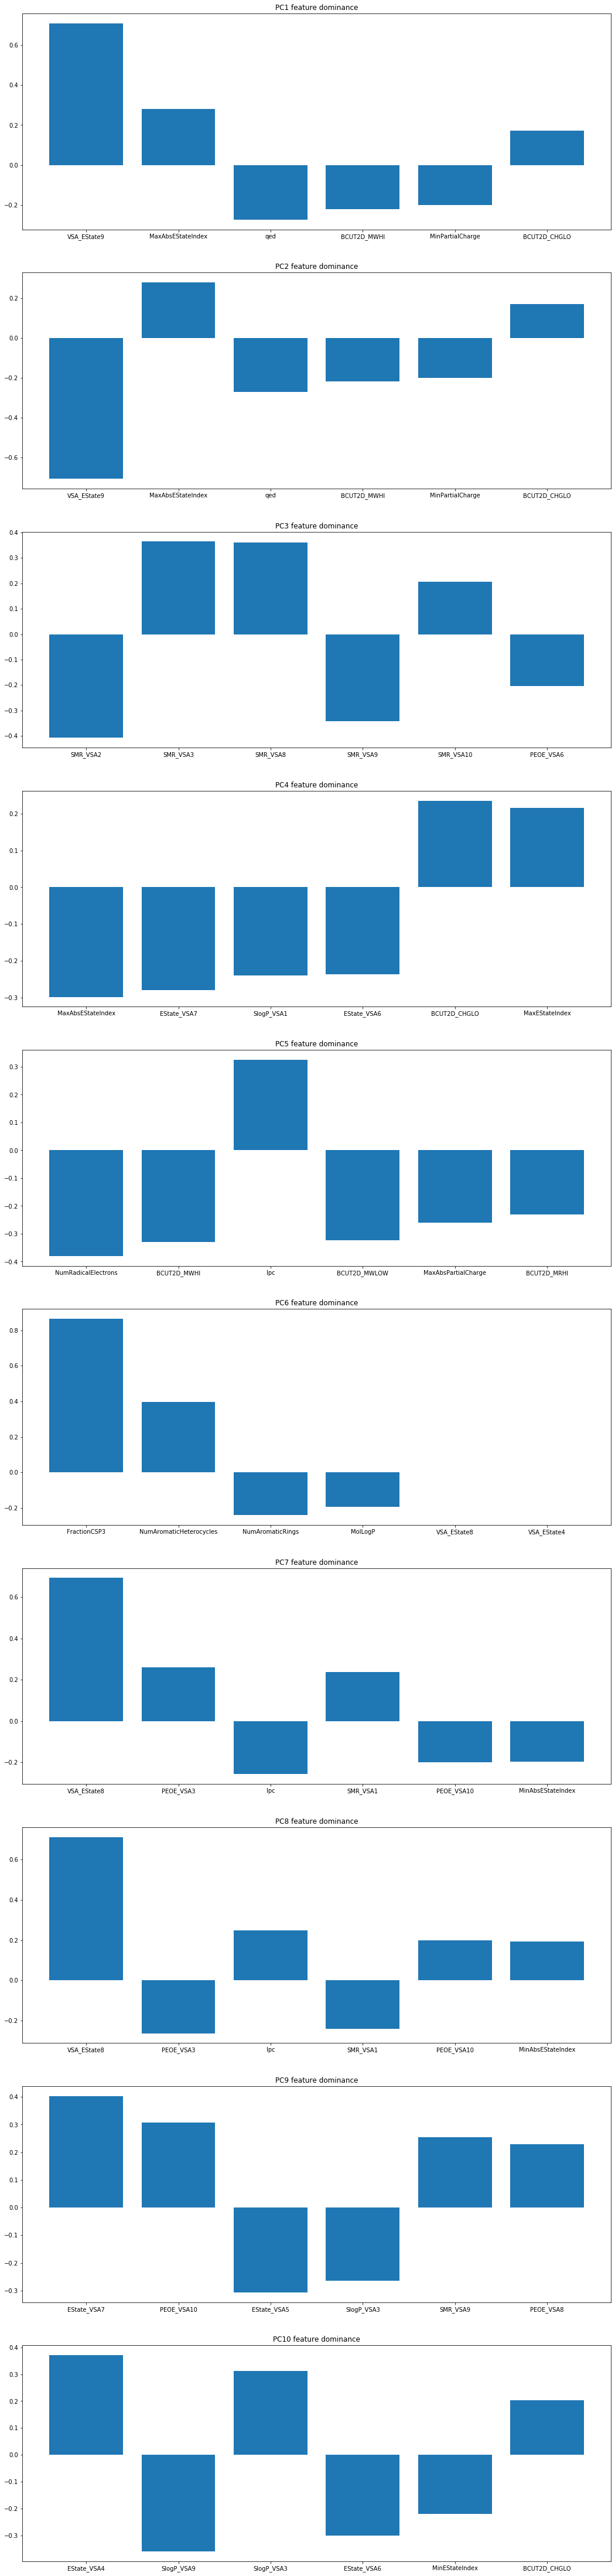

In [19]:
component_map = dict()

for i in range(0,len(df_physical_new.columns)):
    component_map[i] = df_physical_new.columns[i]

def get_top_pc_features(nr_features, nr_comp, scaled_data):
    pca = PCA()
    pca.fit_transform(df_phys_scaled_mm)
    df_loadings = pd.DataFrame(data=pca.components_)
        
    top_vars = [list(abs(df_loadings[i]).nlargest(n=nr_features).index) for i in range(0,nr_comp)]

    return top_vars, df_loadings

top_mm, df_loadings_mm = get_top_pc_features(6,mm_pc_max, df_phys_scaled_mm)

fig, ax = plt.subplots(nrows=len(top_mm), ncols=1, figsize=(3*len(top_mm[0]),8*len(top_mm)))

for i in range(0,len(top_mm)):
    x = []
    y = []
    for j in range(0,len(top_mm[i])):
        x.append(top_mm[i][j])
        y.append(df_loadings_mm.loc[top_mm[i][j],i])
    x = list(map(component_map.get, x))
    ax[i].bar(x,y)
    ax[i].set_title("PC{} feature dominance".format(i+1))

In [20]:
pca = PCA()
pca.fit_transform(df_phys_scaled_mm)
df_loadings = pd.DataFrame(data=pca.components_)
df_hits = pd.DataFrame(abs(df_loadings).sum()/len(df_loadings))
df_hits['feature'] = component_map.values()
df_hits = df_hits.set_index('feature')
df_hits.sort_values(0, ascending=False).head(20)

,0
feature,
EState_VSA9,0.102106
MinEStateIndex,0.101365
SMR_VSA10,0.100519
EState_VSA7,0.099407
EState_VSA8,0.098901
PEOE_VSA6,0.098869
SMR_VSA3,0.098407
VSA_EState9,0.098169
PEOE_VSA14,0.098133


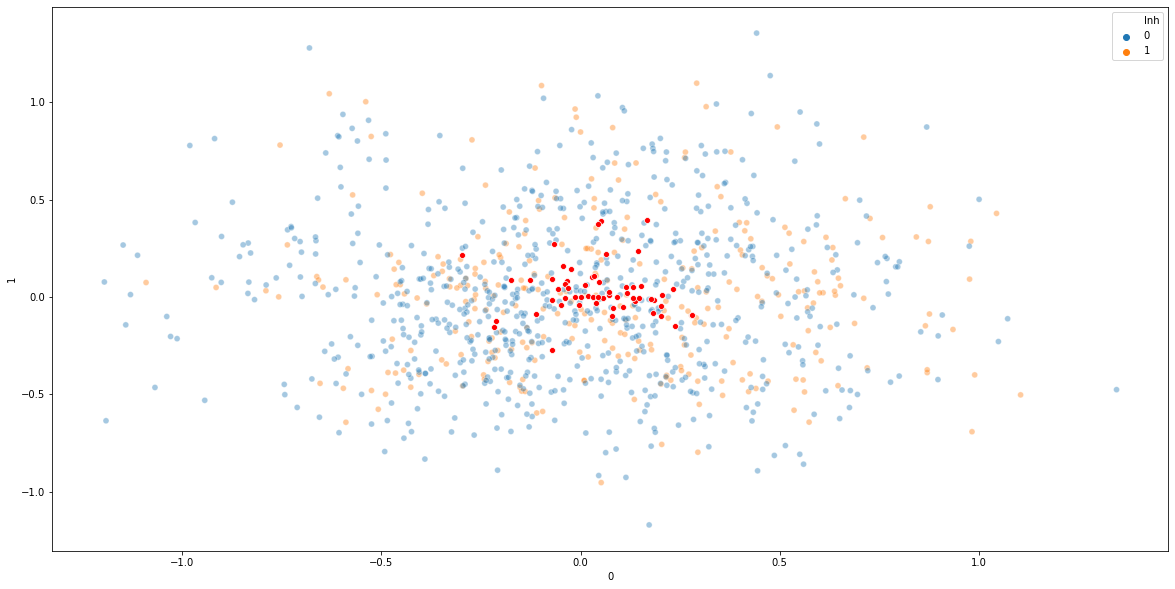

In [21]:
pca = PCA(n_components = mm_pc_max)
df_pca_fitted = pd.DataFrame(pca.fit_transform(df_phys_scaled_mm))
df_pca_fitted['Inh'] = df_data['ALDH1_inhibition']
df_components = pd.DataFrame(pca.components_).T

fig, ax = plt.subplots(figsize=(20,10))
ax = sns.scatterplot(data=df_pca_fitted,x=0,y=1, alpha=0.4, hue='Inh');
sns.scatterplot(data=df_components, x=0,y=1,color='red', ax=ax);